Copyright 2018 The TensorFlow Datasets Authors, Licensed under the Apache License, Version 2.0

In [184]:

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
train = pd.read_csv('train.tsv',sep = '\t')
test = pd.read_csv('test.tsv',sep = '\t')
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [186]:
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [187]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [188]:
class_count = train['Sentiment'].value_counts()
class_count

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of reviews ')

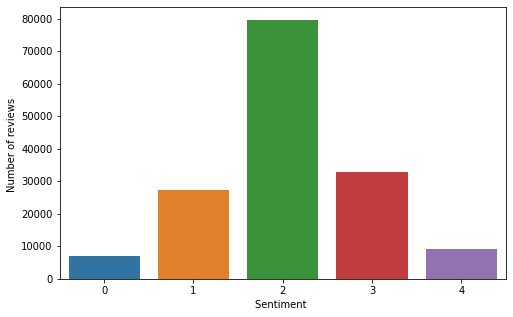

In [189]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')


In [190]:
print('Number of sentences in training set:',len(train['SentenceId'].unique()))
print('Number of sentences in test set:',len(test['SentenceId'].unique()))
print('Average words per sentence in train:',train.groupby('SentenceId')['Phrase'].count().mean())
print('Average words per sentence in test:',test.groupby('SentenceId')['Phrase'].count().mean())

Number of sentences in training set: 8529
Number of sentences in test set: 3310
Average words per sentence in train: 18.297572986282095
Average words per sentence in test: 20.027794561933536


In [191]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

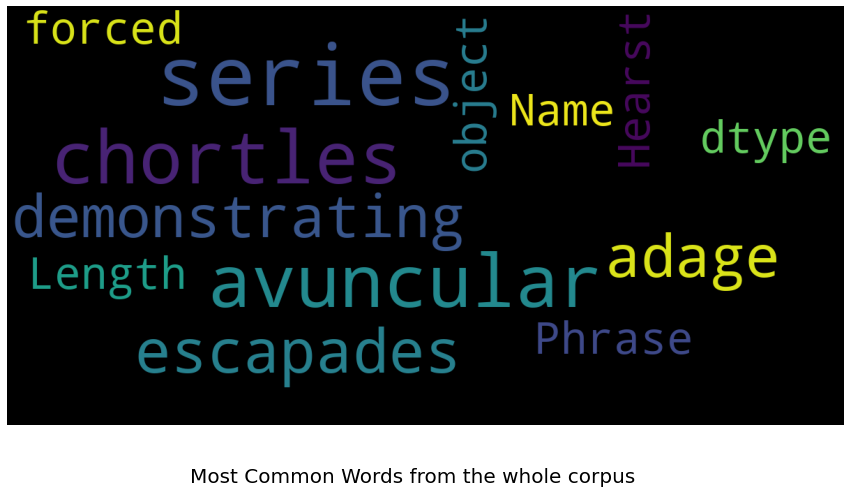

In [192]:

show_wordcloud(train['Phrase'],'Most Common Words from the whole corpus')

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


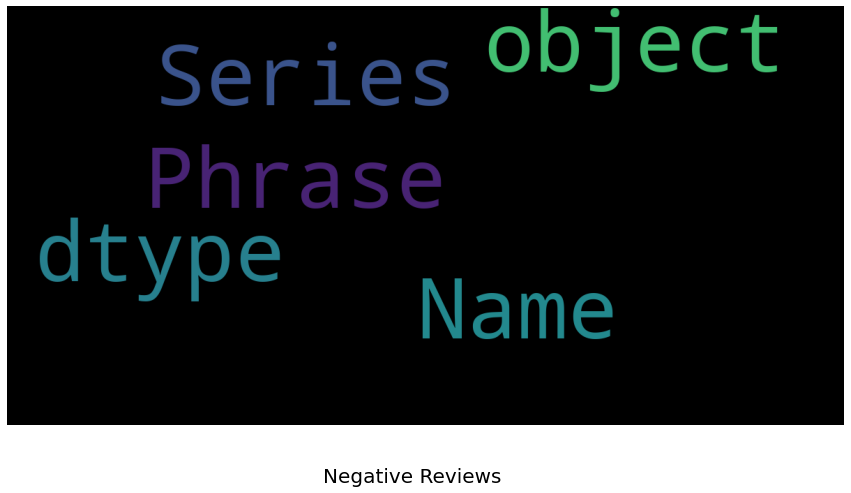

In [193]:

show_wordcloud(train[train['Sentiment'] == 'neg']['Phrase'],'Negative Reviews')

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


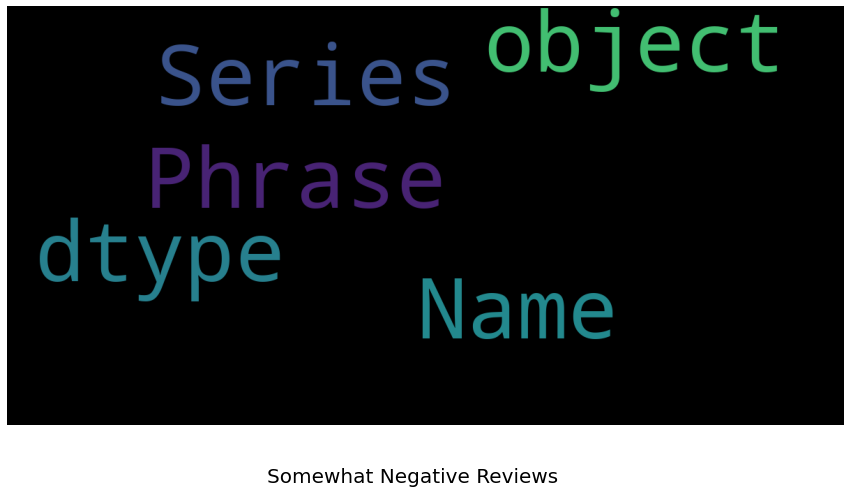

In [194]:

show_wordcloud(train[train['Sentiment'] == 'some what neg']['Phrase'],'Somewhat Negative Reviews')


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


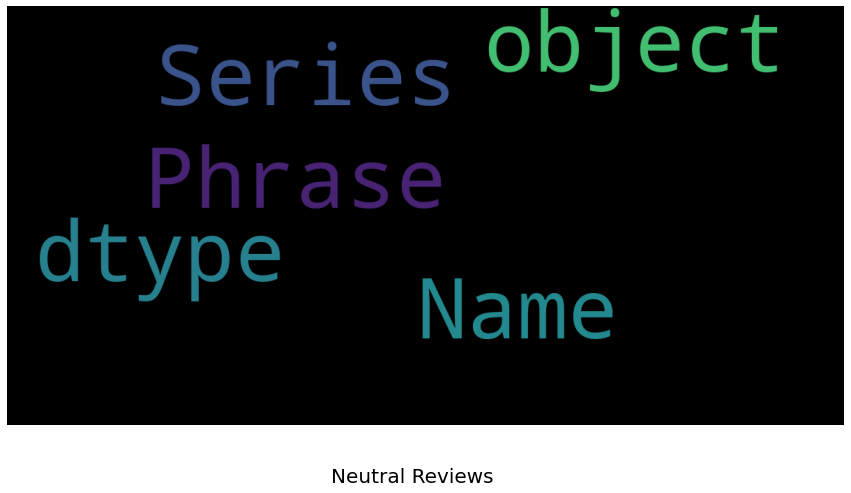

In [195]:
show_wordcloud(train[train['Sentiment'] == 'neutral']['Phrase'],'Neutral Reviews')

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


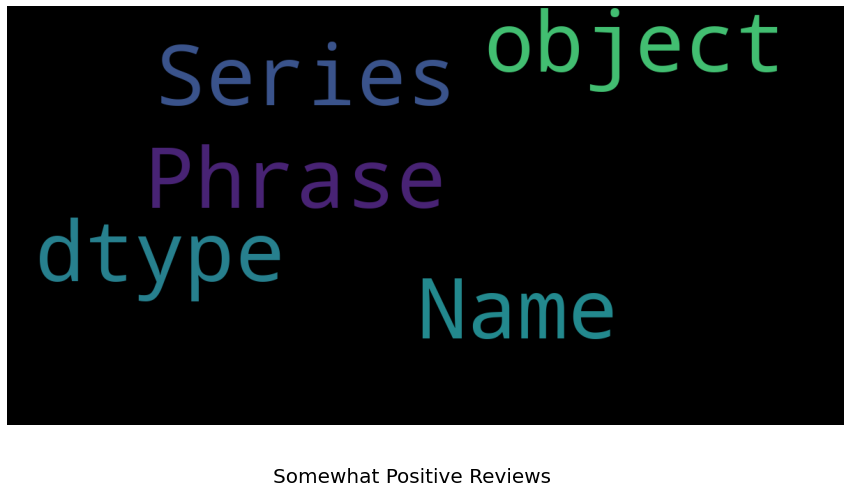

In [196]:
show_wordcloud(train[train['Sentiment'] == 'pos']['Phrase'],'Somewhat Positive Reviews')

In [197]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
tokenizer = TweetTokenizer()

In [198]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [199]:
y = train['Sentiment']

In [200]:
from sklearn.model_selection import train_test_split
x_train , x_val, y_train , y_val = train_test_split(train_vectorized,y,test_size = 0.2)

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [202]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [203]:

svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44      1104
           1       0.50      0.55      0.52      4814
           2       0.82      0.73      0.77     18024
           3       0.52      0.59      0.55      5806
           4       0.41      0.52      0.46      1464

    accuracy                           0.66     31212
   macro avg       0.53      0.58      0.55     31212
weighted avg       0.68      0.66      0.67     31212

0.657920030757401


In [204]:

svm = LinearSVC()
svm.fit(x_train,y_train)
print(classification_report( svm.predict(x_val) , y_val))
print(accuracy_score( svm.predict(x_val) , y_val ))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44      1104
           1       0.50      0.55      0.52      4814
           2       0.82      0.73      0.77     18024
           3       0.52      0.59      0.55      5806
           4       0.41      0.52      0.46      1464

    accuracy                           0.66     31212
   macro avg       0.53      0.58      0.55     31212
weighted avg       0.68      0.66      0.67     31212

0.657920030757401


In [205]:
from keras.utils import to_categorical
target=train.Sentiment.values
y=to_categorical(target)
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [206]:


max_features = 13000
max_words = 50
batch_size = 128
epochs = 3
num_classes=5

In [207]:

from sklearn.model_selection import train_test_split
X_train , X_val , Y_train , Y_val = train_test_split(train['Phrase'],y,test_size = 0.20)

In [208]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping


In [209]:

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [210]:
X_test = tokenizer.texts_to_sequences(test['Phrase'])
X_test =pad_sequences(X_test, maxlen=max_words)

In [211]:
len(X_test)

66292

In [212]:

X_train =pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)
X_test =pad_sequences(X_test, maxlen=max_words)

In [213]:
model5_CNN= Sequential()
model5_CNN.add(Embedding(max_features,100,input_length=max_words))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model5_CNN.add(GlobalMaxPooling1D())
model5_CNN.add(Dense(128,activation='relu'))
model5_CNN.add(Dropout(0.2))
model5_CNN.add(Dense(num_classes,activation='sigmoid'))
model5_CNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model5_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

In [214]:
%%time
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history5=model5_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, verbose=1,callbacks = [early_stop])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 124848 samples, validate on 31212 samples
Epoch 1/3
124848/124848 [==============================] - 47s 380us/step - loss: 0.3530 - accuracy: 0.8445 - val_loss: 0.3086 - val_accuracy: 0.8614
Epoch 2/3
124848/124848 [==============================] - 48s 383us/step - loss: 0.2865 - accuracy: 0.8699 - val_loss: 0.2966 - val_accuracy: 0.8653
Epoch 3/3
124848/124848 [==============================] - 48s 385us/step - loss: 0.2627 - accuracy: 0.8812 - val_loss: 0.2929 - val_accuracy: 0.8668
CPU times: user 4min 3s, sys: 8.44 s, total: 4min 11s
Wall time: 2min 23s


In [215]:
model5_CNN

In [216]:
sub = pd.read_csv('sampleSubmission.csv' , sep = ',')

In [ ]:

y_pred5=model5_CNN.predict_classes(X_test, verbose=1)
sub.Sentiment=y_pred5
sub.to_csv('sub5_CNN.csv',index=False)
sub.head()


In [267]:
def predict(instance):
  instance = tokenizer.texts_to_sequences(instance)
  flat_list = []
  for sublist in instance:
      for item in sublist:
          flat_list.append(item)

  flat_list = [flat_list]
  instance = pad_sequences(flat_list, padding='post', maxlen=max_words)
  pred=np.round(np.argmax(instance,axis=1)).astype(int)
  return model5_CNN.predict(instance), pred

In [269]:
instance=input()
print(instance)
print(predict(instance))


 Get news headlines from India and around the world. Today's breaking news on politics, sports, entertainment, business, life style and many 
 Get news headlines from India and around the world. Today's breaking news on politics, sports, entertainment, business, life style and many 
(array([[0.00376554, 0.08774764, 0.78893286, 0.11475939, 0.0025271 ]],
      dtype=float32), array([38]))
